**Importing the Dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import glob
import os
import visualkeras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from keras import regularizers
from keras.layers.core import Dropout
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121

#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.naive_bayes import GaussianNB

**Resizing the image and Loading the dataset**

In [3]:
# re-size all the images
IMAGE_SIZE = [224, 224]
#loading the data
train_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\train"
test_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\test"
val_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\val"

**Adding Preprocessing layers for DenseNet121 MODEL**

In [4]:
densenet_model = DenseNet121(input_shape=(224,224,3),include_top=False,weights='imagenet')

29097984/29084464 [==============================] - 0s 0us/step


In [5]:
densenet_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

In [6]:
# useful for getting number of classes
folders = glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\*")

In [51]:
# don't train existing weights
for layer in densenet_model.layers:
  layer.trainable = False

x = densenet_model
#x= Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),MaxPooling2D(pool_size=(2,2))
#x= Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),MaxPooling2D(pool_size=(2,2))
#x= Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),MaxPooling2D(pool_size=(2,2))
#x= Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),MaxPooling2D(pool_size=(2,2)),
#x= Conv2D(6,3,3,input_shape=(224,224,3),activation='relu')
x = Flatten()(densenet_model.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.25)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet_model.input, outputs=prediction)

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [52]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

Total params: 57,216,506
Trainable params: 50,179,002
Non-trainable params: 7,037,504
__________________________________________________________________________________________________


**Visualization of the model**

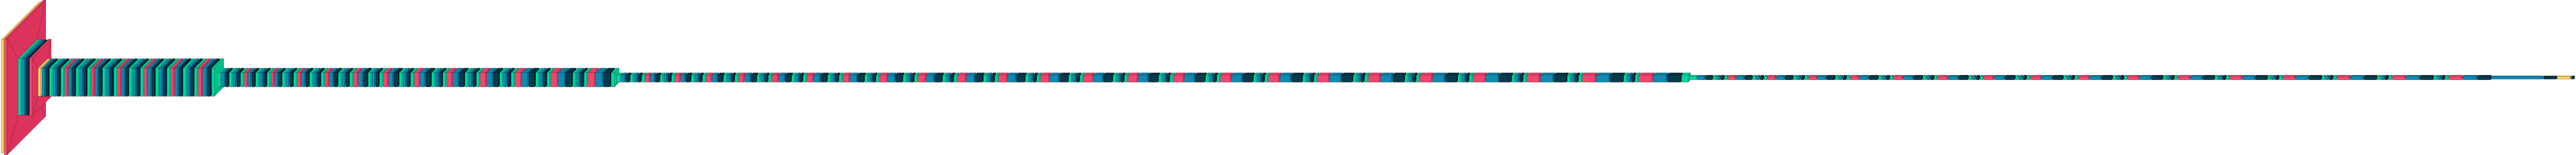

In [53]:
visualkeras.layered_view(model).show() # display using your system viewer
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

****Data Augmentation and preparing Image data generator****

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [56]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


**Callback Functions**

In [57]:
#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [58]:
#ModelCheckpoint callback saves a model at some interval. 
filepath=r"C:\Users\Computing\Downloads\data-task1\data-task1\Densenet_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [59]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, mode='min', verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for eight consecutive epochs.

In [60]:
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logsdensenet.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

**Fit the model**

In [61]:
#Training the neural network
#We can now use these generators to train our model. 
#Give this a name so we can call it later for plotting loss, accuracy etc. as a function of epochs.
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks= callbacks_list)

model.save('densenet_model.hdf5')  # always save your weights after training or during training

<ipython-input-61-fc11c12944ff>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
94/94 [==============================] - 122s 1s/step - loss: 6.4671 - accuracy: 0.7267 - val_loss: 0.5182 - val_accuracy: 0.8020
Epoch 2/25
94/94 [==============================] - 118s 1s/step - loss: 0.4586 - accuracy: 0.7953 - val_loss: 0.4367 - val_accuracy: 0.8060
Epoch 3/25
94/94 [==============================] - 118s 1s/step - loss: 0.4262 - accuracy: 0.8057 - val_loss: 0.4355 - val_accuracy: 0.8160
Epoch 4/25
94/94 [==============================] - 116s 1s/step - loss: 0.4340 - accuracy: 0.8027 - val_loss: 0.4225 - val_accuracy: 0.8220
Epoch 5/25
94/94 [==============================] - 116s 1s/step - loss: 0.4321 - accuracy: 0.8030 - val_loss: 0.4984 - val_accuracy: 0.7920
Epoch 6/25
94/94 [==============================] - 116s 1s/step - loss: 0.4257 - accuracy: 0.8073 - val_loss: 0.4277 - val_accuracy: 0.8080
Epoch 7/25
94/94 [==============================] - 117s 1s/step - loss: 0.4164 - accuracy: 0.8113 - val_loss: 0.4298 - val_accuracy: 0.7980
Epoch 8/25
94

**Plotting the Loss and Accuracy Curve**

Values stored in history are ... 
 {'loss': [6.46713399887085, 0.4585840702056885, 0.4261757433414459, 0.433958500623703, 0.43214747309684753, 0.4256577491760254, 0.41641488671302795, 0.41199636459350586, 0.41317489743232727, 0.4085142910480499, 0.4117516279220581, 0.4092320203781128, 0.4092804789543152, 0.4104616343975067], 'accuracy': [0.7266666889190674, 0.7953333258628845, 0.8056666851043701, 0.8026666641235352, 0.8029999732971191, 0.8073333501815796, 0.8113333582878113, 0.812333345413208, 0.8136666417121887, 0.8183333277702332, 0.815666675567627, 0.8159999847412109, 0.815666675567627, 0.8163333535194397], 'val_loss': [0.5181645750999451, 0.43669432401657104, 0.4354972839355469, 0.42247137427330017, 0.4983915388584137, 0.42771047353744507, 0.42977917194366455, 0.4456774890422821, 0.4140026867389679, 0.48782095313072205, 0.4137289524078369, 0.42330801486968994, 0.4327540695667267, 0.42614275217056274], 'val_accuracy': [0.8019999861717224, 0.8059999942779541, 0.8159999847412109, 0.82

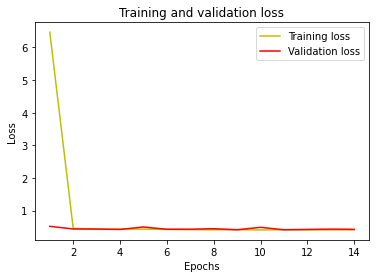

In [62]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Values stored in history are ... 
 {'loss': [6.46713399887085, 0.4585840702056885, 0.4261757433414459, 0.433958500623703, 0.43214747309684753, 0.4256577491760254, 0.41641488671302795, 0.41199636459350586, 0.41317489743232727, 0.4085142910480499, 0.4117516279220581, 0.4092320203781128, 0.4092804789543152, 0.4104616343975067], 'accuracy': [0.7266666889190674, 0.7953333258628845, 0.8056666851043701, 0.8026666641235352, 0.8029999732971191, 0.8073333501815796, 0.8113333582878113, 0.812333345413208, 0.8136666417121887, 0.8183333277702332, 0.815666675567627, 0.8159999847412109, 0.815666675567627, 0.8163333535194397], 'val_loss': [0.5181645750999451, 0.43669432401657104, 0.4354972839355469, 0.42247137427330017, 0.4983915388584137, 0.42771047353744507, 0.42977917194366455, 0.4456774890422821, 0.4140026867389679, 0.48782095313072205, 0.4137289524078369, 0.42330801486968994, 0.4327540695667267, 0.42614275217056274], 'val_accuracy': [0.8019999861717224, 0.8059999942779541, 0.8159999847412109, 0.82

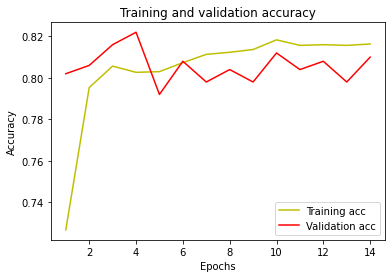

In [63]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation part of the model**

In [64]:
#Evaluating the model
train_loss, train_acc = model.evaluate(training_set, steps=32)
validation_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 17s 489ms/step - loss: 0.4261 - accuracy: 0.8100
Train: 0.803, Test: 0.810


In [65]:
train_loss, train_acc = model.evaluate(training_set, steps=32)
test_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 17s 495ms/step - loss: 0.4261 - accuracy: 0.8100
Train: 0.812, Test: 0.810


In [66]:
# Evaluate the model
scores = model.evaluate_generator(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-66-d33ba6da31cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


Loss of the model: 0.43
Test Accuracy: 81.00%


In [67]:
scores = model.evaluate_generator(training_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Training Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-67-ddfd143517da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(training_set)


Loss of the model: 0.39
Training Accuracy: 81.80%


**Confusion matrix**

In [68]:
test_pred = model.predict_generator(test_set)
y_pred = np.argmax(test_pred, axis=1)

<ipython-input-68-c14bf3b956d5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


<Figure size 432x288 with 0 Axes>

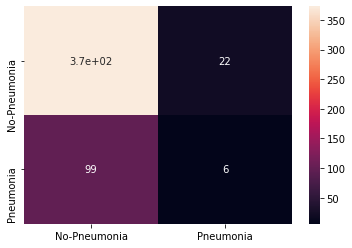

<Figure size 432x288 with 0 Axes>

In [70]:
#Visualizing confusion matrix
cm = confusion_matrix(test_set.labels,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
test_pred = model.predict_generator(test_set)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(test_set.labels, np.round(y_pred))*100
cm = confusion_matrix(test_set.labels, np.round(y_pred))
classify_report = classification_report(test_set.labels, np.round(y_pred))


TN, FP, FN, TP = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
#precision = TP/(TP+FP)*100
#recall = TP/(TP+FN)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

# print classification report
print('Classification report on test data')
print(classify_report)

<ipython-input-82-44768ab77d36>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


CONFUSION MATRIX ------------------
[[373  22]
 [ 99   6]]

TEST METRICS ----------------------
Accuracy: 75.8%
Precision: 0.21428571428571427%
Recall: 0.05714285714285714%
F1-score: 0.09022556390977444

TRAIN METRIC ----------------------
Train acc: 81.63%
Classification report on test data
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       395
           1       0.21      0.06      0.09       105

    accuracy                           0.76       500
   macro avg       0.50      0.50      0.48       500
weighted avg       0.67      0.76      0.70       500



**TPR=TRUE POSITIVE RATE, FPR=FALSE POSITIVE RATE, TNR=TRUE NEGATIVE RATE, FNR=FALSE NEGATIVE RATE**

In [83]:
TPR = TP / (TP + FN)
TNR = TN / (TP + TN)
FPR = FP / (TP + FN)
FNR = FN / (FP + TN)

print('TRUE POSITIVE RATE is: {}'.format(TPR))
print('TRUE NEGATIVE RATE is: {}'.format(TNR))
print('FALSE POSITIVE RATE is: {}'.format(FPR))
print('FALSE NEGATIVE RATE is: {}'.format(FNR))

TRUE POSITIVE RATE is: 0.05714285714285714
TRUE NEGATIVE RATE is: 0.9841688654353562
FALSE POSITIVE RATE is: 0.20952380952380953
FALSE NEGATIVE RATE is: 0.25063291139240507


**Prediction of the model**

In [84]:
from PIL import Image, ImageEnhance
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

Person is Affected By PNEUMONIA


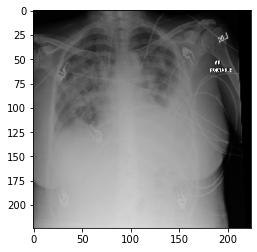

In [85]:
model=load_model('CNN_model1.hdf5')
img=image.load_img(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\pneumonia\00a05408-8291-4231-886e-13763e103161.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Person is not affected by PNEUMONIA")
plt.figure()
plt.imshow(img)